In [1]:
from PIL import Image
import rasterio
from matplotlib import pyplot
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
# Define the folder path
def create_binary_mask(input_path, output_path):
    
    # List all the tiff files
    tif_files = [f for f in os.listdir(input_path) if f.endswith('.tif')]

    # Set the number of rows and columns for subplots
    num_rows = len(tif_files)
    num_cols = 3  # Original image + Mask

    # Create a figure with subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    # Loop through each file and process it
    for i, tif_file in enumerate(tif_files):
        tiff_image = rasterio.open(os.path.join(input_path, tif_file))
        array = tiff_image.read(1).astype(np.float32())
        
        # Display the image using matplotlib
        # plt.imshow(array, cmap='gray')
        # plt.title(tif_file)  # Set the title to the file name
        # plt.show()
        axs[i, 0].imshow(array, cmap='gray')
        axs[i, 0].set_title("Original " + tif_file)
        
        masked = np.where(array <= 5000, 0, 1)
            
        # Create a new figure for each mask display
        # plt.figure()    
        # plt.imshow(masked, cmap='gray')
        # plt.title("Mask for " + tif_file)
        # plt.show()
        axs[i, 1].imshow(masked, cmap='gray')
        axs[i, 1].set_title("Mask for " + tif_file)
        
        from rasterio.features import sieve
        sieved_msk = sieve(masked, size=800)
        
        #Create a profile to save masks
        profile = tiff_image.profile
        profile.update(
            dtype=rasterio.float32,
            count=1,
            compress='lzw'
        )
        
        #save masked images
        mask_seived_name = os.path.splitext(tif_file)[0]+"_mask.tif"
        mask_seived_path = os.path.join(output_path, mask_seived_name)
        with rasterio.open(mask_seived_path, 'w', **profile) as dst:
            dst.write(sieved_msk.astype(np.float32), 1)
        # plt.figure()
        # plt.imshow(sieved_msk, cmap='gray')
        # plt.title("Sieved Mask for " + tif_file)
        # plt.show()
        axs[i, 2].imshow(sieved_msk, cmap='gray')
        axs[i, 2].set_title("Sieved Mask for " + tif_file)
    # Adjust subplot spacing
    plt.tight_layout()

    # Show the subplots
    plt.show()

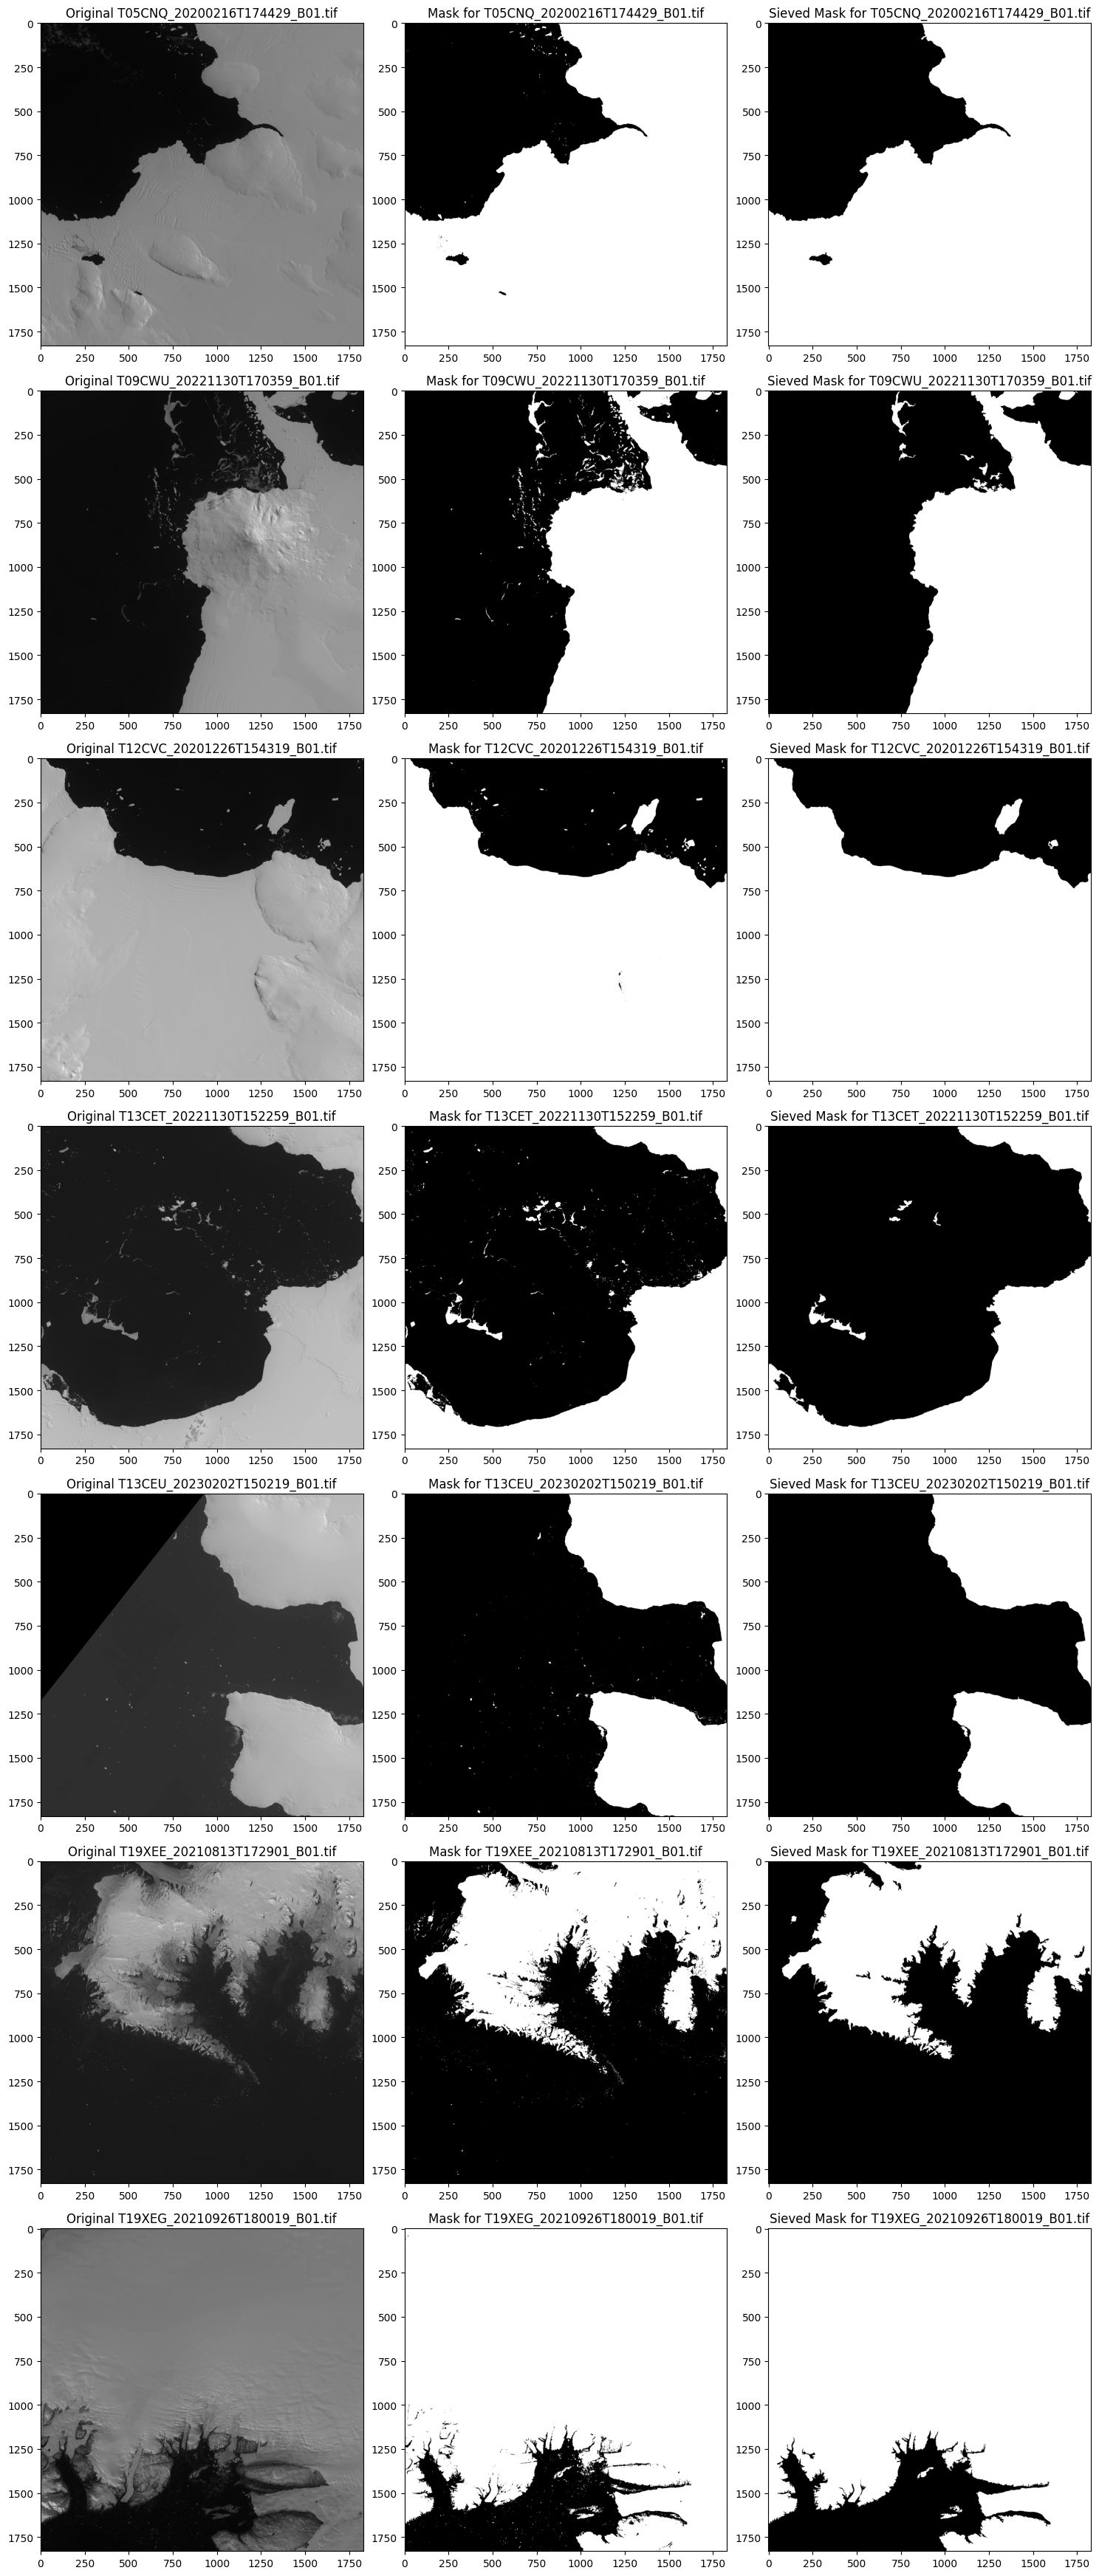

In [4]:
input_path = r"C:\Users\Chris\Desktop\Lectures\Semester_2\Advanced_programming\Deep-Learning-uploads\Deep-Learning-Final-Project-SS-2023\Scene_data_2"
output_path = r"C:\Users\Chris\Desktop\Lectures\Semester_2\Advanced_programming\Deep-Learning-uploads\Deep-Learning-Final-Project-SS-2023\mask_new"

create_binary_mask(input_path, output_path)